In [1]:
import pylearn2.utils
import pylearn2.config
import theano
import neukrill_net.dense_dataset
import neukrill_net.utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import holoviews as hl
%load_ext holoviews.ipython
import sklearn.metrics

Using gpu device 3: Tesla K40c
:0: FutureWarning: IPython widgets are experimental and may change in the future.


Welcome to the HoloViews IPython extension! (http://ioam.github.io/holoviews/)
Available magics: %compositor, %opts, %params, %view, %%labels, %%opts, %%view


In [11]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/parallel_conv_recent.pkl")

In [12]:
m2 = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/parallel_conv_fixed_recent.pkl")

In [9]:
def make_curves(model, *args):
    curves = None
    for c in args:
        channel = model.monitor.channels[c]
        c = c[0].upper() + c[1:]
        if not curves:
            curves = hl.Curve(zip(channel.epoch_record, channel.val_record),group=c)
        else:
            curves += hl.Curve(zip(channel.epoch_record, channel.val_record),group=c)
    return curves

Valid_objective
      I  : Curve.Valid_objective   (y)
      II : Curve.Valid_objective   (y)
   Valid_y_nll    
      I  : Curve.Valid_y_nll   (y)
      II : Curve.Valid_y_nll   (y)
   Train_y_nll    
      I  : Curve.Train_y_nll   (y)
      II : Curve.Train_y_nll   (y)
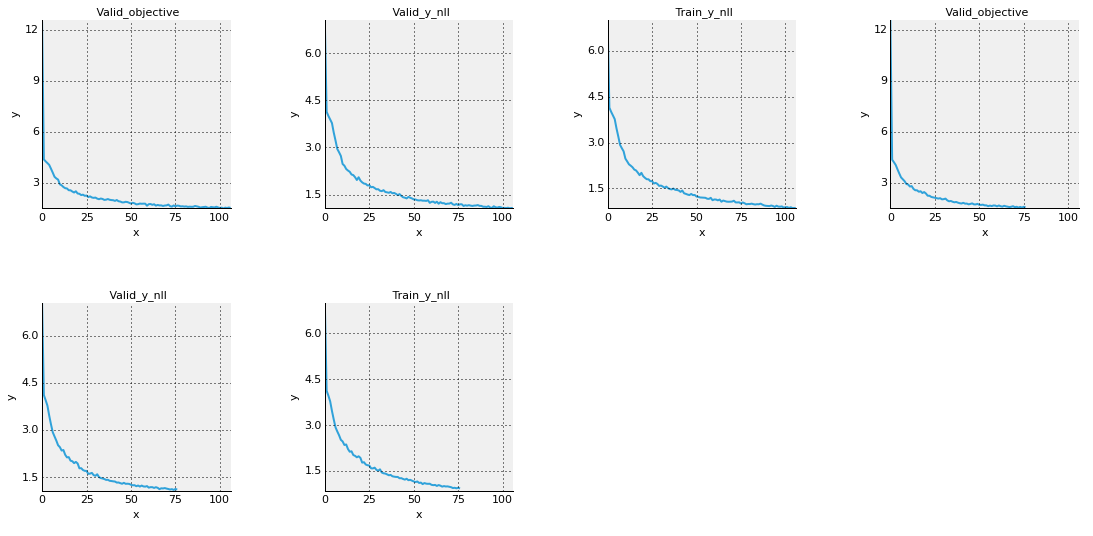

In [13]:
make_curves(m,"valid_objective","valid_y_nll","train_y_nll") + make_curves(m2,"valid_objective","valid_y_nll","train_y_nll")

In [14]:
m.monitor.get_examples_seen()

2564352

In [15]:
m2.monitor.get_examples_seen()

1838592